# Competent cell efficiency calculations

## 11-17-21 Electro

Prepared electro-competent cells with Fred and then transformed according to the lab protocol. Noticed that cells were very sticky, like they had lysed. Lots of cells probably died at some point reducing the potential competency.

Image of plates used for testing efficiency.

![](IMG_5863.jpg)

In [1]:
import pandas as pd
%load_ext rpy2.ipython

In [2]:
EC_11_17_tsv = 'Compotent cells - 11-17-21-EC.tsv'
EC_11_17_df = pd.read_csv(EC_11_17_tsv, sep='\t')

In [3]:
%%R
library(ggplot2)
library(RColorBrewer)
library(ggpubr)

[1] 10


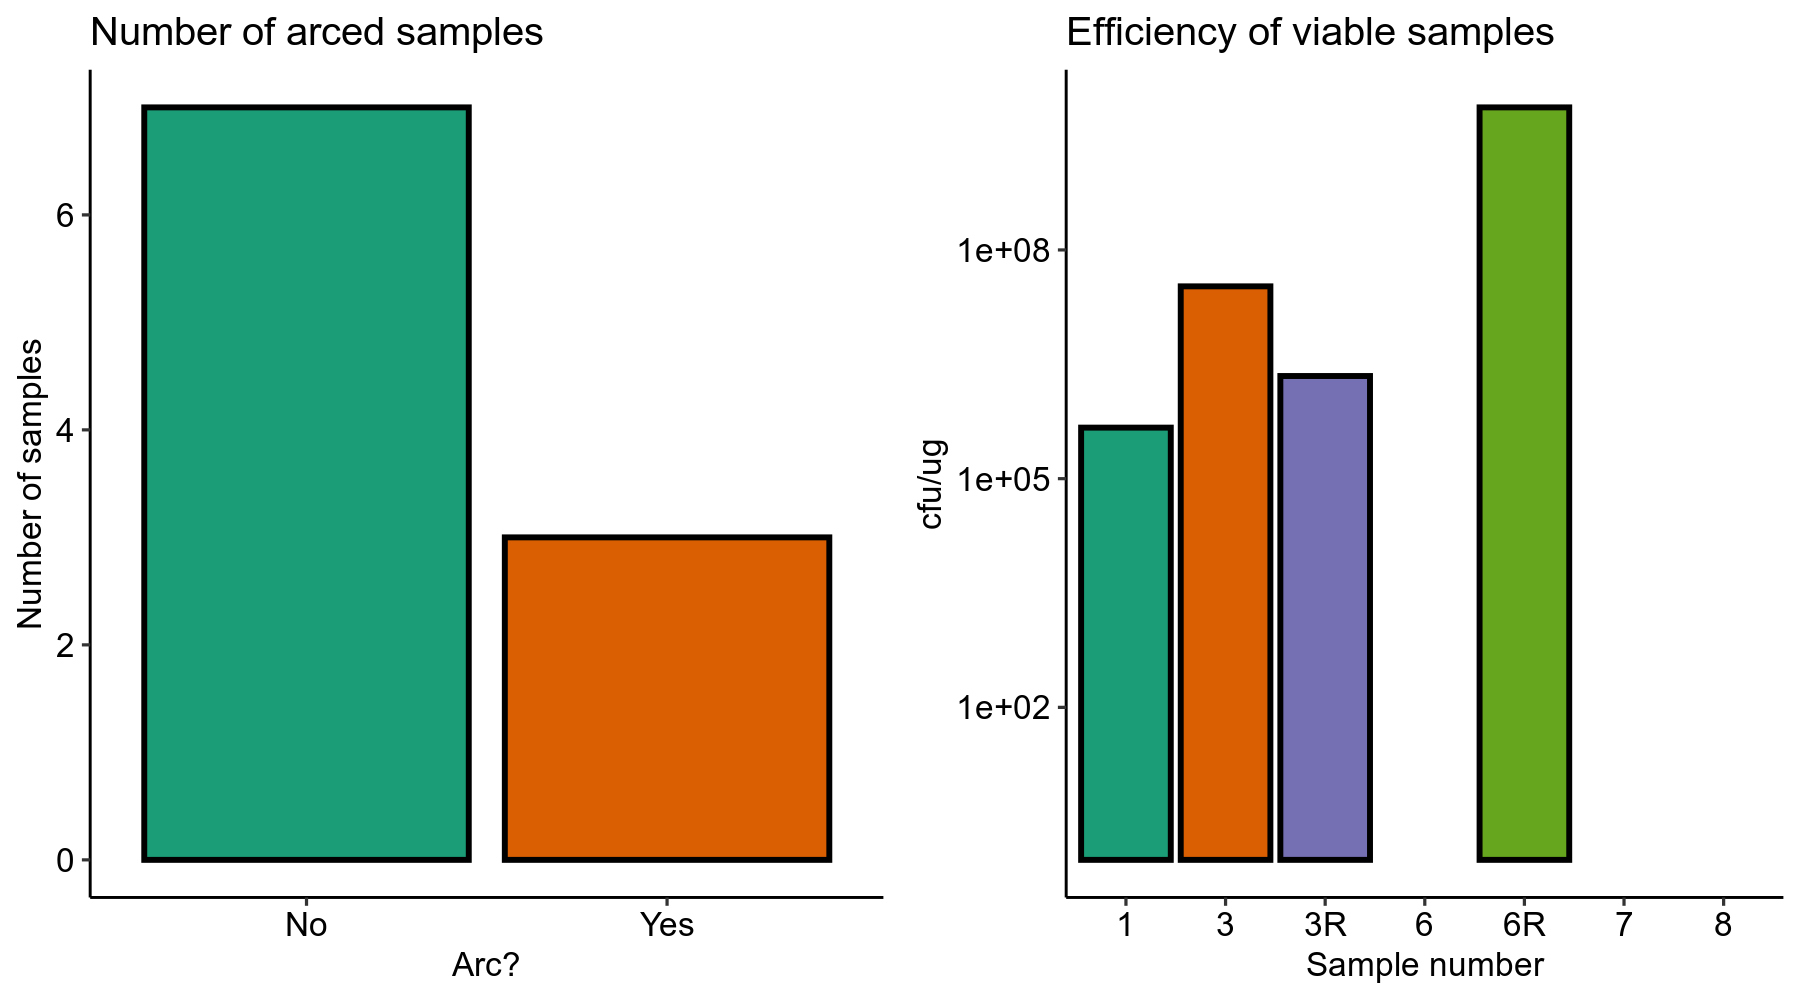

In [4]:
%%R -i EC_11_17_df -w 9 -h 5 --units in -r 200

arc_vs_no_arc <- function(df){
    
    ggplot(df, aes(x=Arc, fill=Arc)) + geom_bar(color='black', size=1) +
    labs(
        y='Number of samples', 
        x='Arc?', title='Number of arced samples')
    
}

eff_per_dilution <- function(df){
    
    df.no_arc = subset(df, Arc=='No')
    print(nrow(df))
    ggplot(df.no_arc, aes(
        x=as.factor(Dilution_Number), 
        y=Efficiency, 
        fill=Dilution_Number)
          ) +
            geom_bar(stat='identity', color='black', size=1) +
             scale_y_continuous(trans='log10') +
    labs(x='Sample number', y='cfu/ug', title='Efficiency of viable samples')
    
}


apply.theme <- function(plot){
    
    
    plot + theme_pubr() + scale_fill_brewer(palette='Dark2') +
    theme(legend.position = "none") 
    
    
}

arc <- apply.theme(arc_vs_no_arc(EC_11_17_df))
dilution <- apply.theme(eff_per_dilution(EC_11_17_df))


ggarrange(arc, dilution)

In [5]:
EC_11_17_df

,Dilution_Number,Volume_DNA_ul,Dilution_ng_ul,Number_of_colonies,Dilution_recovery,Efficiency,Arc
0,1,0.5,3.000000e+01,700.0,0.1,4.670000e+05,No
1,2,0.5,3.000000e+00,NaN,0.1,0.000000e+00,Yes
2,3,0.5,3.000000e-01,500.0,0.1,3.330000e+07,No
3,4,0.5,3.000000e-02,NaN,0.1,0.000000e+00,Yes
4,5,0.5,3.000000e-03,NaN,0.1,0.000000e+00,Yes
5,6,0.5,3.000000e-04,NaN,0.1,0.000000e+00,No
6,7,0.5,3.000000e-05,NaN,0.1,0.000000e+00,No
7,8,0.5,3.000000e-06,NaN,0.1,0.000000e+00,No
8,6R,0.5,3.000000e-07,1.0,0.9,7.410000e+09,No
9,3R,0.5,3.000000e-01,300.0,0.9,2.220000e+06,No
